In [33]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.dates import DayLocator, DateFormatter
import numpy as np
import pandas as pd
from itertools import product
%matplotlib inline

In [22]:
df = pd.read_csv("six_der_sc_202403_l3_data.csv")
df = df.iloc[::50,:]    # sampling factor, tweak resolution here
dates = pd.to_datetime(df["TimeUTC"], format="ISO8601")
time_start = dates.iloc[0]
time_end = dates.iloc[-1]
time_start_s = time_start.strftime('%a %d %b %Y %H:%M')
time_end_s = time_end.strftime('%a %d %b %Y %H:%M')

Plot SIXS-P particle flux time series data

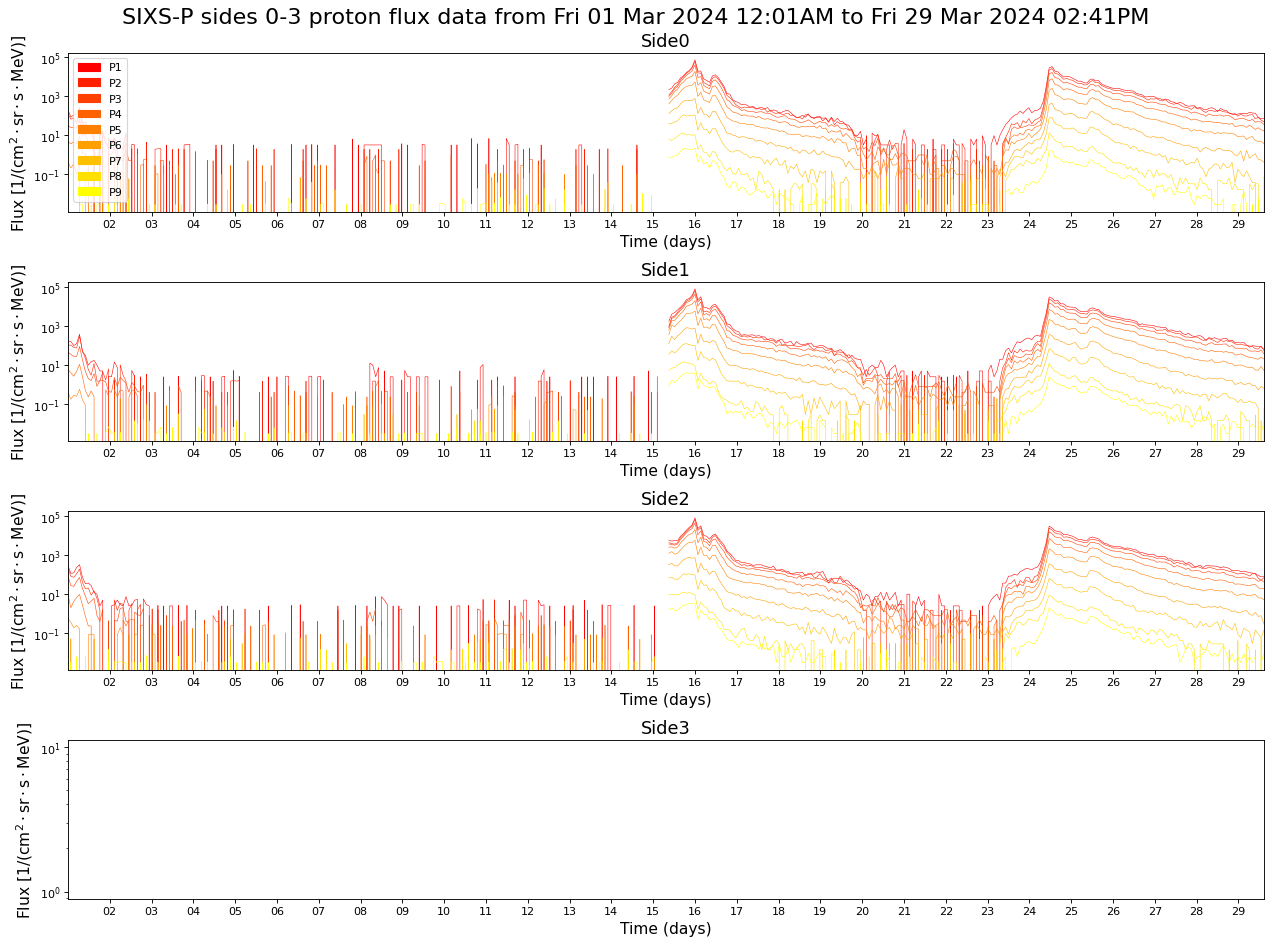

In [23]:
# create a list of side-channel combinations. Proton channels range from 1 to 9
sides = range(4)
channel_range = range(1, 10)

channels = [f"Side{i}_P{j}" for i, j in product(sides, channel_range)]

# reshape it to plotting configuration
channels = np.array(channels).reshape((len(sides), len(channel_range)))

fig, axs = plt.subplots(len(sides), 1, figsize=(16, 12), dpi=80, sharex=True)
fig.suptitle(f"SIXS-P sides 0-3 proton flux data from {time_start_s} to {time_end_s}", fontsize=20)

# colormapping
colors = plt.cm.autumn(np.linspace(0,1,len(channel_range)))

# date ticks
day_locator = DayLocator(interval=1)
date_formatter = DateFormatter("%d")
axs[0].xaxis.set_major_locator(day_locator)
axs[0].xaxis.set_major_formatter(date_formatter)

# plotting loop
for i in sides:
    for j in range(len(channel_range)):    
        axs[i].plot(dates, df[channels[i, j]], label=f"P{j+1}", color=colors[j], lw=0.5)
    axs[i].set_title(f"Side{i}", fontsize=16)
    axs[i].set_xlabel("Time (days)", fontsize=14)
    axs[i].set_ylabel(r"Flux $\mathrm{[1/(cm^2 \cdot sr\cdot s \cdot MeV)]}$", fontsize=14)
    axs[i].semilogy()
    axs[i].tick_params("x", labelbottom=True)

plt.xlim((time_start, time_end))

# create proxy artists with same colormap for clearer legend handle
handles = [Patch(color=c, label=f"P{p}") for c, p in zip(colors, channel_range)]
axs[0].legend(handles=handles)

plt.tight_layout()
plt.show()

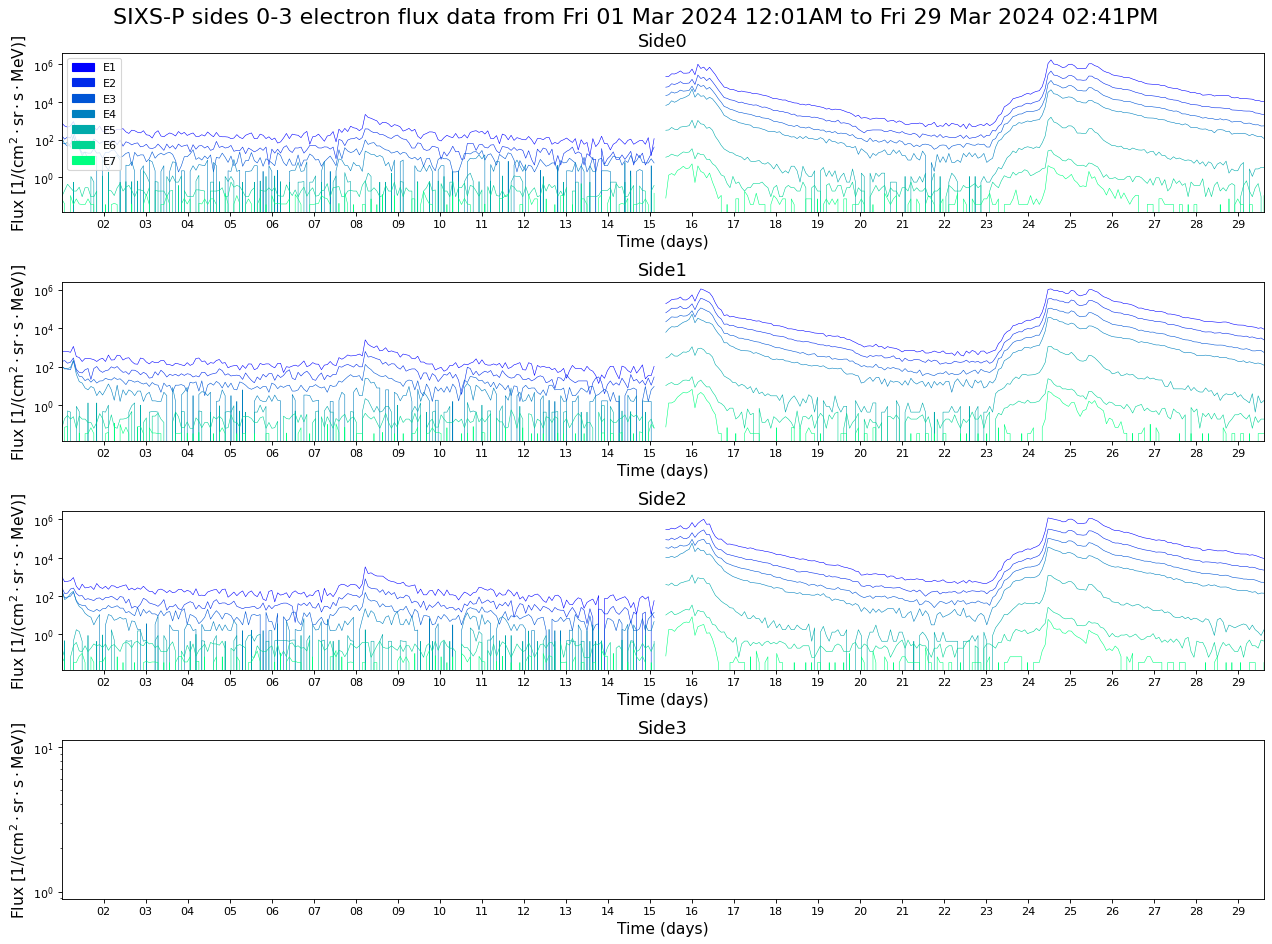

In [24]:
# electron channels range from 1 to 7
channel_range = range(1, 8)

channels = [f"Side{i}_E{j}" for i, j in product(sides, channel_range)]

channels = np.array(channels).reshape((len(sides), len(channel_range))) 

fig, axs = plt.subplots(len(sides), 1, figsize=(16, 12), dpi=80, sharex=True)
fig.suptitle(f"SIXS-P sides 0-3 electron flux data from {time_start_s} to {time_end_s}", fontsize=20)

# colormapping
colors = plt.cm.winter(np.linspace(0,1,len(channel_range)))

# date ticks
axs[0].xaxis.set_major_locator(day_locator)
axs[0].xaxis.set_major_formatter(date_formatter)

# plotting loop
for i in sides:
    for j in range(len(channel_range)):    
        axs[i].plot(dates, df[channels[i, j]], label=f"E{j+1}", color=colors[j], lw=0.5)
    axs[i].set_title(f"Side{i}", fontsize=16)
    axs[i].set_xlabel("Time (days)", fontsize=14)
    axs[i].set_ylabel(r"Flux $\mathrm{[1/(cm^2 \cdot sr\cdot s \cdot MeV)]}$", fontsize=14)
    axs[i].semilogy()
    axs[i].tick_params("x", labelbottom=True)

plt.xlim((time_start, time_end))

# create proxy artists with same colormap for clearer legend handle
handles = [Patch(color=c, label=f"E{p}") for c, p in zip(colors, channel_range)]
axs[0].legend(handles=handles)

plt.tight_layout()
plt.show()